# India Little - Final Project 

## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:

* Your data must be publically available for free.
* Your data should be interesting to _you_. You want your final project to be something you're proud of.
* Your data should be "big enough":
    - It should have at least 1,000 rows.
    - It should have enough of columns to be interesting.
    - If you have questions, contact a member of the instructional team.

## 2) Provide a link to your data
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

https://www.kaggle.com/crowdflower/twitter-user-gender-classification

This dataset describes users Twitter profiles. 

### Features of Interest:
* Unit ID - Twitter user ID number.
* Gender - Perceived gender of user
* Gender Confidence - Confidence level of perceived gender
* Sidebar Color - Color of profile, in hex codes
* Text - User's sample tweets


## 3) Import your data

Read in the tweets.csv file from the local directory.

In [2]:
import pandas as pd
import numpy as np

#Read in the csv file
df = pd.read_csv("tweets.csv", encoding = 'latin_1')

## 4) Show me the head of your data.

This is the first 5 rows of data in the dataframe. Only 20 of the 26 total columns are displayed.

In [4]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


## 5) Show me the shape of your data

This data spans 20,050 rows with 26 columns.

In [5]:
df.shape

(20050, 26)

## 6) Show me the proportion of missing observations for each column of your data

Here we calculate the proportion of missing observations, and print a list of each feature along
with its proportion of observations that are missing.
We can see that most of the features we will be analyzing are not missing observations, except for the "gold" features which by definiton do not include everything.

In [6]:
df_missing = df.isna()
df_missing_sum = df_missing.sum()
df_missing_frac = df_missing_sum / len(df)
print(df_missing_frac)

_unit_id                 0.000000
_golden                  0.000000
_unit_state              0.000000
_trusted_judgments       0.000000
_last_judgment_at        0.002494
gender                   0.004838
gender:confidence        0.001297
profile_yn               0.000000
profile_yn:confidence    0.000000
created                  0.000000
description              0.186733
fav_number               0.000000
gender_gold              0.997506
link_color               0.000000
name                     0.000000
profile_yn_gold          0.997506
profileimage             0.000000
retweet_count            0.000000
sidebar_color            0.000000
text                     0.000000
tweet_coord              0.992070
tweet_count              0.000000
tweet_created            0.000000
tweet_id                 0.000000
tweet_location           0.373267
user_timezone            0.388928
dtype: float64


## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

Twitter is a social media platform used for instantaneous news, marketing, and social connection. Tweets provide rich and accessible data that can be used to investigate the political climate, current events, and sentiment analyses. In this data set, I am interested in exploring differences in tweets between men and women. 

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

* X - the text of the users tweets
* y - the gender of the user

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

vect = CountVectorizer().fit(df['text'])
X = vect.transform(df['text'])

#encoder = LabelEncoder().fit(df['gender'])
#y = encoder.transform(df['gender'])

X_train, X_test, y_train, y_test = train_test_split(X, df['gender'], random_state = 0)


print("Number of Unique Words: {}\n".format(len(vect.vocabulary_)))
print("Bag of Words:\n {}\n".format(repr(X_train.toarray()[::20])))

feature_names = vect.get_feature_names()
print("First 20 features: {}\n".format(feature_names[:20]))
print("Every 1000 features: {}\n".format(feature_names[::1000]))

Number of Unique Words: 43121

Bag of Words:
 array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

First 20 features: ['00', '000', '00000000', '00000000000000002344', '001', '0057bowkey', '007', '00am', '00irccrrhb', '00min', '00pm', '00sev', '00y1au3v3p', '00zaue0wbk', '01', '01446', '01613', '017', '01iubj2hqu', '01pszpdiqs']

Every 1000 features: ['00', '3huxxiimm3', '8eeghcajop', 'activists', 'angelica', 'aztso3g1mz', 'bighairandboobs', 'brokeassnanny', 'cdnbusinessmag', 'coheed', 'crota', 'densk', 'dqnpgp6d6d', 'emmab84', 'fans', 'foxnews', 'girll', 'halloween', 'hoosier', 'increasing', 'jasonkersey', 'karoo', 'lamat', 'longevity', 'martynapluta', 'mjpo007', 'nathanbrannon', 'nxlpaintball', 'ovmwhcaato', 'pinwheels', 'proxico_za', 'rctwv97bpy', 'rmhagen', 'scanning', 'sidestep', 'spirituality', 'survivors', 'thefordfanatic', 'tra

AxesSubplot(0.125,0.125;0.775x0.755)


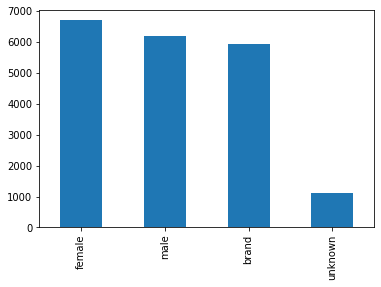

In [4]:
print(df['gender'].value_counts().plot.bar())

In [ ]:
nb = multinomialNB()
